# Can we predict which zipcode is next to experience explosive growth?

To answer this question, we will take the average airbnb features in 2019 and see if we can build a model that classifies each zipcode as high, low or moderate growth in 2020.

## Load Libraries and Dataframe

In [114]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [115]:
airbnb_class_df = pd.read_csv("cleaned_data/airbnb_model_data_clean.csv", index_col=0)
zillow_class_df = pd.read_csv("cleaned_data/zillow_model_data_clean.csv", index_col=0)

In [116]:
airbnb_class_df.head()

,last_scraped,id,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,...,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate
0,2015-10-03,5795487,30066816,0,1.0,37080.0,36.274038,-86.910077,2,1.0,...,0,0,0,0,0,0,0,0,1,0.694371
1,2015-10-03,8082102,55304,0,1.0,37189.0,36.259632,-86.870691,4,1.0,...,0,0,0,0,0,0,0,0,1,0.428064
2,2015-10-03,2480117,3155867,0,3.0,37218.0,36.217547,-86.843971,2,0.5,...,0,0,0,0,0,0,0,0,1,0.658864
3,2015-10-03,8291271,1356379,0,1.0,37218.0,36.212933,-86.853004,2,1.0,...,0,0,0,0,0,0,0,0,1,0.428064
4,2015-10-03,997187,5479170,0,1.0,37218.0,36.221009,-86.873935,1,2.0,...,0,0,0,0,0,0,0,0,1,0.029590


In [117]:
zillow_class_df

,37013,37211,37075,38401,37128,37130,37064,37066,37122,37167,...,37141,38454,37057,37016,38567,37151,38552,37152,37140,avg_home_value
index,,,,,,,,,,,,,,,,,,,,,
1996-01-01,109670.0,106734.0,138933.0,96857.0,113158.0,98542.0,185356.0,120976.0,151290.0,106580.0,...,NaN,80110.0,50190.0,NaN,69190.0,67996.0,NaN,142441.0,NaN,109399.880435
1996-02-01,110113.0,107099.0,139381.0,97144.0,113284.0,98564.0,185830.0,121068.0,151334.0,106864.0,...,NaN,80458.0,50147.0,NaN,69869.0,67665.0,NaN,142789.0,NaN,109566.967391
1996-03-01,110502.0,107465.0,140085.0,97433.0,113470.0,98835.0,186363.0,121462.0,151342.0,107379.0,...,NaN,80650.0,50106.0,NaN,70266.0,67587.0,NaN,143113.0,NaN,109809.858696
1996-04-01,111295.0,108224.0,141375.0,97997.0,113974.0,99312.0,187234.0,122248.0,151801.0,108288.0,...,NaN,81164.0,50064.0,NaN,71463.0,67163.0,NaN,143664.0,NaN,110273.195652
1996-05-01,112128.0,108963.0,142817.0,98505.0,114588.0,99791.0,188162.0,123302.0,152404.0,109208.0,...,NaN,81770.0,50390.0,NaN,72299.0,67058.0,NaN,144220.0,NaN,110767.663043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,259031.0,293072.0,321959.0,238371.0,291541.0,247622.0,506703.0,287540.0,360988.0,267956.0,...,216270.0,156813.0,136128.0,196512.0,166713.0,156146.0,126236.0,235094.0,175110.0,288751.259615
2020-11-01,261394.0,295822.0,327365.0,240257.0,293749.0,249687.0,512290.0,291682.0,363554.0,269825.0,...,218049.0,158826.0,136663.0,196971.0,167100.0,156890.0,126264.0,238528.0,177055.0,291187.711538
2020-12-01,264071.0,299249.0,332140.0,241925.0,296529.0,252005.0,518804.0,295491.0,366496.0,272156.0,...,219840.0,161071.0,137790.0,198081.0,167797.0,158137.0,126226.0,242451.0,177552.0,293967.509615


## Add % Increases in Zipcode Prices

In [119]:
zillow_class_df = zillow_class_df.T
zillow_class_df

index,1996-01-01,1996-02-01,1996-03-01,1996-04-01,1996-05-01,1996-06-01,1996-07-01,1996-08-01,1996-09-01,1996-10-01,...,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01
37013,109670.000000,110113.000000,110502.000000,111295.000000,112128.000000,112982.000000,113867.000000,114736.000000,115551.000000,116199.000000,...,251507.00,252671.00,253906.000000,255162.000000,257001.000000,259031.000000,261394.000000,264071.000000,266303.000000,268556.000000
37211,106734.000000,107099.000000,107465.000000,108224.000000,108963.000000,109639.000000,110367.000000,111082.000000,111876.000000,112514.000000,...,282124.00,283913.00,285863.000000,287953.000000,290494.000000,293072.000000,295822.000000,299249.000000,302286.000000,305349.000000
37075,138933.000000,139381.000000,140085.000000,141375.000000,142817.000000,144082.000000,145445.000000,146630.000000,147829.000000,148737.000000,...,309049.00,310372.00,312097.000000,313768.000000,317473.000000,321959.000000,327365.000000,332140.000000,337490.000000,344421.000000
38401,96857.000000,97144.000000,97433.000000,97997.000000,98505.000000,98876.000000,99176.000000,99412.000000,99541.000000,99683.000000,...,229911.00,231713.00,233094.000000,234462.000000,236156.000000,238371.000000,240257.000000,241925.000000,243219.000000,244825.000000
37128,113158.000000,113284.000000,113470.000000,113974.000000,114588.000000,115269.000000,115989.000000,116728.000000,117504.000000,118271.000000,...,283084.00,285083.00,286883.000000,288171.000000,289714.000000,291541.000000,293749.000000,296529.000000,300063.000000,303777.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37151,67996.000000,67665.000000,67587.000000,67163.000000,67058.000000,67093.000000,67431.000000,67678.000000,67417.000000,67352.000000,...,153947.00,154307.00,154702.000000,155258.000000,155945.000000,156146.000000,156890.000000,158137.000000,160025.000000,161658.000000
38552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123610.00,124530.00,125302.000000,125829.000000,126088.000000,126236.000000,126264.000000,126226.000000,126329.000000,126262.000000
37152,142441.000000,142789.000000,143113.000000,143664.000000,144220.000000,145047.000000,145783.000000,145725.000000,146104.000000,146220.000000,...,221599.00,225053.00,227110.000000,230542.000000,232892.000000,235094.000000,238528.000000,242451.000000,247005.000000,251824.000000
37140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,174218.00,173689.00,173042.000000,172364.000000,173759.000000,175110.000000,177055.000000,177552.000000,178666.000000,179792.000000


In [120]:
zillow_class_df['20_21_inc'] = ((zillow_class_df['2021-02-01']/zillow_class_df['2020-02-01'])-1)*100
zillow_class_df['19_20_inc'] = ((zillow_class_df['2020-02-01']/zillow_class_df['2019-02-01'])-1)*100

In [121]:
zillow_class_df['CAGR'] = ((zillow_class_df['2021-02-01']/zillow_class_df['2016-02-01'])**(1/5)-1)*100

In [123]:
# decided to use 20-21 increase as our growth measure
zillow_class_df['20_21_inc'].describe()

count    105.000000
mean       8.822197
std        3.131870
min       -4.101828
25%        7.613578
50%        9.194465
75%       10.670426
max       16.034558
Name: 20_21_inc, dtype: float64

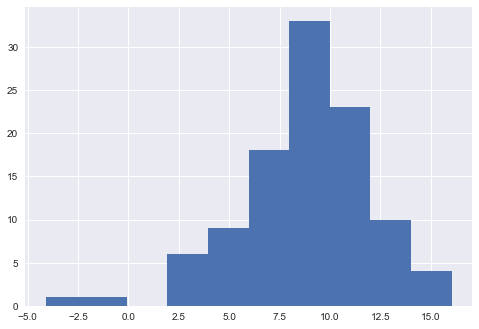

In [124]:
zillow_class_df['20_21_inc'].hist()

In [125]:
def growth_category(x):
    if x < 9:
        return 'low'
    elif x > 11:
        return 'high'
    else:
        return 'moderate'

In [126]:
zillow_class_df['growth'] = zillow_class_df['20_21_inc'].apply(lambda x: growth_category(x))

In [128]:
zillow_class_df['growth'].value_counts()

low         49
moderate    33
high        23
Name: growth, dtype: int64

## Create a dictionary of zipcodes and growth categories

In [129]:
growth_zips = dict(zip(list(zillow_class_df.index),list(zillow_class_df.growth)))

## Create Dataframe of 2019 Airbnb Data by Zipcode

In [130]:
airbnb_class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233369 entries, 0 to 233410
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   last_scraped                      233369 non-null  object 
 1   id                                233369 non-null  int64  
 2   host_id                           233369 non-null  int64  
 3   host_is_superhost                 233369 non-null  int64  
 4   host_listings_count               233369 non-null  float64
 5   zipcode                           233369 non-null  float64
 6   latitude                          233369 non-null  float64
 7   longitude                         233369 non-null  float64
 8   accommodates                      233369 non-null  int64  
 9   bathrooms                         233369 non-null  float64
 10  beds                              233369 non-null  float64
 11  price                             233369 non-null  f

In [131]:
airbnb_class_df['last_scraped'] = pd.to_datetime(airbnb_class_df['last_scraped'])
airbnb_class_df.set_index('last_scraped',inplace=True)

In [132]:
airbnb_monthly = airbnb_class_df.resample('MS').mean()
airbnb_annual = airbnb_class_df.resample('Y').mean()

In [133]:
zipcode_class_df = airbnb_class_df.groupby('zipcode').sum()
zipcode_class_df

,id,host_id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,72577309334,361905047778,972,13819.0,1.024581e+05,-2.462503e+05,12251,4408.5,6712.0,345434.00,...,0,0,0,0,0,0,641,10,0,2027.981326
37015.0,595604787,2286507735,23,252.0,1.304405e+03,-3.129073e+03,96,38.0,57.0,3629.00,...,0,0,0,0,0,0,0,0,36,10.806155
37020.0,263181639,1988349055,0,91.0,2.533685e+02,-6.074133e+02,114,24.5,39.0,3732.00,...,7,0,0,0,0,0,0,0,0,3.718438
37026.0,39642501,121235121,0,534.0,3.619281e+01,-8.672556e+01,4,1.0,2.0,155.00,...,1,0,0,0,0,0,0,0,0,0.428064
37027.0,6307181012,21100495037,180,1914.0,1.463199e+04,-3.523070e+04,1640,531.0,926.0,53590.00,...,0,0,74,0,0,0,332,0,0,507.966202
37029.0,14866872,133537490,1,41.0,2.908306e+02,-6.939458e+02,46,12.0,16.0,830.00,...,0,8,0,0,0,0,0,0,0,1.530773
37064.0,283577834,1399056378,1,27.0,5.400223e+02,-1.305276e+03,76,23.0,34.0,2720.00,...,0,0,0,0,0,0,0,0,0,3.984745
37072.0,30151908847,107838280628,607,11243.0,4.746937e+04,-1.133484e+05,6098,1895.5,3173.0,190081.43,...,0,1087,0,0,216,0,1,0,3,789.773803
37073.0,640300427,4704661581,16,317.0,7.643532e+02,-1.822000e+03,126,21.0,64.0,1790.00,...,0,21,0,0,0,0,0,0,0,14.059048


In [134]:
zipcode_class_df = airbnb_class_df['2019'].groupby('zipcode')
zipcode_class_monthly_df = zipcode_class_df.resample('M').sum()

In [135]:
zipcode_class_monthly_df

id      host_id  host_is_superhost  \
zipcode last_scraped                                               
37013.0 2019-01-31    1767116405   8551343029                 26   
        2019-02-28    1755938936   8370096275                 22   
        2019-03-31    1641778473   7743355394                 21   
        2019-04-30    1697418342   7691877521                 20   
        2019-05-31    2159415319  11020522254                 20   
...                          ...          ...                ...   
37232.0 2019-06-30             0            0                  0   
        2019-07-31             0            0                  0   
        2019-08-31             0            0                  0   
        2019-09-30      38474804     58355472                  0   
37243.0 2019-01-31      59988556     39228095                  1   

                      host_listings_count    zipcode     latitude  \
zipcode last_scraped                                                
37013.0 2019-01-31                  171.0  2850001.0  2775.875495   
        2019-02-28                  170.0  2812988.0  2739.942842   
        2019-03-31                  154.0  2664936.0  2595.740680   
        2019-04-30                  161.0  2627923.0  2559.571080   
        2019-05-31                  175.0  3183118.0  3100.330060   
...                                   ...        ...          ...   
37232.0 2019-06-30                    0.0        0.0     0.000000   
        2019-07-31                    0.0        0.0     0.000000   
        2019-08-31                    0.0        0.0     0.000000   
        2019-09-30                    2.0    37232.0    36.149930   
37243.0 2019-01-31                    9.0    74486.0    72.333809   

                        longitude  accommodates  bathrooms   beds  ...  \
zipcode last_scraped                                               ...   
37013.0 2019-01-31   -6672.015945           356      126.0  196.0  ...   
        2019-02-28   -6585.435346           346      123.5  191.0  ...   
        2019-03-31   -6238.745060           326      116.5  182.0  ...   
        2019-04-30   -6151.917140           317      113.5  180.0  ...   
        2019-05-31   -7451.688920           398      136.5  232.0  ...   
...                           ...           ...        ...    ...  ...   
37232.0 2019-06-30       0.000000             0        0.0    0.0  ...   
        2019-07-31       0.000000             0        0.0    0.0  ...   
        2019-08-31       0.000000             0        0.0    0.0  ...   
        2019-09-30     -86.813110             2        2.0    1.0  ...   
37243.0 2019-01-31    -173.565999            12        5.0    8.0  ...   

                      neighborhood_East_Nashville  neighborhood_Madison  \
zipcode last_scraped                                                      
37013.0 2019-01-31                              0                     0   
        2019-02-28                              0                     0   
        2019-03-31                              0                     0   
        2019-04-30                              0                     0   
        2019-05-31                              0                     0   
...                                           ...                   ...   
37232.0 2019-06-30                              0                     0   
        2019-07-31                              0                     0   
        2019-08-31                              0                     0   
        2019-09-30                              0                     0   
37243.0 2019-01-31                              0                     0   

                      neighborhood_Midtown  neighborhood_North_Nashville  \
zipcode last_scraped                                                       
37013.0 2019-01-31                       0                             0   
        2019-02-28                       0                             0   
    

In [136]:
zipcode_class_monthly_df.drop(columns='zipcode', inplace=True)

In [137]:
zipcode_class_monthly_df.reset_index(inplace=True)

In [138]:
zipcode_class_monthly_df['last_scraped'] = pd.to_datetime(zipcode_class_monthly_df['last_scraped'])
zipcode_class_monthly_df.set_index('last_scraped',inplace=True)

In [139]:
zipcode_class_monthly_df_grp = zipcode_class_monthly_df.groupby('zipcode')
zipcode_class_ann_df = zipcode_class_monthly_df_grp.resample('A').mean()

In [140]:
zipcode_class_ann_df

,,zipcode,id,host_id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate
zipcode,last_scraped,,,,,,,,,,,,,,,,,,,,,
37013.0,2019-12-31,37013.0,2.199842e+09,1.118011e+10,26.833333,328.750000,3058.320416,-7350.573946,369.166667,131.916667,209.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.500000,0.416667,0.000000,61.819930
37015.0,2019-12-31,37015.0,1.636789e+07,7.666481e+07,0.750000,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.290143
37026.0,2019-12-31,37026.0,3.964250e+07,1.212351e+08,0.000000,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428064
37027.0,2019-12-31,37027.0,1.982956e+08,6.155288e+08,6.416667,28.916667,414.461105,-997.933056,43.916667,14.625000,25.583333,...,0.000000,0.000000,2.083333,0.000000,0.000000,0.000000,9.416667,0.000000,0.000000,14.684705
37064.0,2019-12-31,37064.0,3.055183e+07,4.462003e+07,0.000000,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428064
37072.0,2019-12-31,37072.0,9.678657e+08,3.564924e+09,18.166667,491.833333,1495.127072,-3570.105354,182.833333,59.208333,96.416667,...,0.000000,33.666667,0.000000,0.000000,7.333333,0.000000,0.000000,0.000000,0.166667,27.507123
37073.0,2019-12-31,37073.0,3.059304e+07,2.291713e+08,0.750000,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.773442
37076.0,2019-12-31,37076.0,1.434272e+09,5.802612e+09,41.416667,488.250000,2764.777564,-6617.522785,296.666667,104.291667,155.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.714284
37080.0,2019-12-31,37080.0,3.355815e+08,1.337936e+09,3.833333,90.333333,544.729935,-1303.419127,94.416667,32.708333,86.916667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,8.382759


In [141]:
airbnb_2019 = airbnb_class_df['2019-01-01':'2020-01-01']
airbnb_2019

,id,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,beds,...,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate
last_scraped,,,,,,,,,,,,,,,,,,,,,
2019-10-18,6422,12172,1,1.0,37206.0,36.17315,-86.73581,2,1.0,3.0,...,1,0,0,0,0,0,0,0,0,0.970542
2019-10-18,20847,79021,1,3.0,37216.0,36.19640,-86.70427,1,1.0,1.0,...,1,0,0,0,0,0,0,0,0,4.655445
2019-10-18,25341,79021,1,3.0,37216.0,36.19705,-86.70494,1,1.0,2.0,...,1,0,0,0,0,0,0,0,0,3.708574
2019-10-18,25342,79021,1,3.0,37216.0,36.19712,-86.70445,1,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0.078906
2019-10-18,25613,95811,1,1.0,37206.0,36.17826,-86.74162,2,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0.844292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-21,38759583,252119936,0,1.0,37013.0,36.01776,-86.66782,6,2.5,3.0,...,0,0,0,0,0,0,1,0,0,0.428064
2019-09-20,38766473,160474948,0,48.0,37219.0,36.16730,-86.78397,2,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0.428064
2019-09-20,38767259,160474948,0,48.0,37219.0,36.16730,-86.78397,2,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0.428064


In [142]:
airbnb_dec_19 = airbnb_class_df['2019-12']
airbnb_dec_19_sum = airbnb_dec_19.groupby('zipcode').sum()

In [143]:
airbnb_dec_19_sum

,id,host_id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,2644044233,13556339658,34,648.0,3280.609710,-7884.777140,369,136.5,202.0,9612.0,...,0,0,0,0,0,0,19,0,0,87.042346
37015.0,16367890,76664807,1,1.0,36.233650,-86.906450,2,1.0,1.0,55.0,...,0,0,0,0,0,0,0,0,1,0.284061
37027.0,237962112,526091990,6,60.0,432.475510,-1041.298860,51,16.5,28.0,1228.0,...,0,0,2,0,0,0,10,0,0,17.018017
37072.0,1119952946,3987505676,23,640.0,1670.666280,-3989.124930,225,68.0,118.0,6473.0,...,0,40,0,0,6,0,0,0,0,23.958443
37073.0,30593043,229171323,1,1.0,36.397830,-86.761820,6,1.0,2.0,80.0,...,0,1,0,0,0,0,0,0,0,0.647028
37076.0,1752679915,7637026701,53,490.0,2894.303130,-6927.736310,315,107.0,166.0,7610.0,...,0,0,0,0,0,0,0,0,0,55.737770
37080.0,371110851,1460525872,7,64.0,544.734220,-1303.373580,102,36.5,93.0,5344.0,...,0,0,0,0,0,0,0,0,15,11.155313
37115.0,1576935152,5344651305,40,973.0,2501.853360,-5983.209630,365,110.0,201.0,10824.0,...,46,23,0,0,0,0,0,0,0,47.496712
37138.0,851822593,3535421189,12,1938.0,1159.863500,-2772.245380,143,51.0,77.0,7609.0,...,0,0,0,0,0,0,0,0,0,15.842320


In [144]:
airbnb_2019_zips = airbnb_2019.groupby('zipcode').mean()
airbnb_2019_zips

,id,host_id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,2.593134e+07,1.317891e+08,0.316306,3.875246,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.241650,0.004912,0.000000,0.728722
37015.0,1.636789e+07,7.666481e+07,0.750000,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.290143
37026.0,3.964250e+07,1.212351e+08,0.000000,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428064
37027.0,1.724309e+07,5.352425e+07,0.557971,2.514493,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,...,0.000000,0.000000,0.181159,0.000000,0.000000,0.000000,0.818841,0.000000,0.000000,1.276931
37064.0,3.055183e+07,4.462003e+07,0.000000,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428064
37072.0,2.351091e+07,8.659735e+07,0.441296,11.947368,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,...,0.000000,0.817814,0.000000,0.000000,0.178138,0.000000,0.000000,0.000000,0.004049,0.668189
37073.0,3.059304e+07,2.291713e+08,0.750000,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.773442
37076.0,1.876910e+07,7.593386e+07,0.541985,6.389313,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.676741
37080.0,2.237210e+07,8.919574e+07,0.255556,6.022222,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558851


In [145]:
cat_cols = ['host_is_superhost','instant_bookable','neighborhood_Bellevue',
                    'neighborhood_Donelson', 'neighborhood_Downtown',
                    'neighborhood_East_Nashville', 'neighborhood_Madison',
                    'neighborhood_Midtown', 'neighborhood_North_Nashville',
                    'neighborhood_Parkwood', 'neighborhood_South_Nashville',
                    'neighborhood_Southeast_Nashville', 'neighborhood_West_Nashville',
                    'neighborhood_Whites_Creek','property_type_Condominium', 'property_type_House',
                    'property_type_Other', 'property_type_Townhouse','room_type_Hotel room', 
                    'room_type_Private room','room_type_Shared room']

In [146]:
categorical_sums = airbnb_dec_19_sum[cat_cols]
#categorical_sums = zipcode_class_ann_df[cat_cols].reset_index()
categorical_sums

,host_is_superhost,instant_bookable,neighborhood_Bellevue,neighborhood_Donelson,neighborhood_Downtown,neighborhood_East_Nashville,neighborhood_Madison,neighborhood_Midtown,neighborhood_North_Nashville,neighborhood_Parkwood,...,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,34,61,0,0,0,0,0,0,0,0,...,19,0,0,4,56,7,12,0,49,0
37015.0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
37027.0,6,7,0,0,0,0,0,2,0,0,...,10,0,0,1,7,1,1,0,1,0
37072.0,23,28,0,0,0,0,40,0,0,6,...,0,0,0,0,27,10,5,0,16,1
37073.0,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
37076.0,53,40,0,78,0,0,0,0,0,0,...,0,0,0,2,56,10,5,0,43,2
37080.0,7,13,0,0,0,0,0,0,0,0,...,0,0,15,0,4,10,0,0,7,0
37115.0,40,43,0,0,0,46,23,0,0,0,...,0,0,0,1,44,18,2,0,14,0
37138.0,12,18,0,32,0,0,0,0,0,0,...,0,0,0,0,20,6,2,0,13,1


In [147]:
airbnb_2019_zips.drop(columns=cat_cols, inplace=True)
airbnb_2019_zips = pd.concat([airbnb_2019_zips,categorical_sums], axis=1)

In [148]:
airbnb_2019_zips

,id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,guests_included,...,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,2.593134e+07,1.317891e+08,3.875246,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,2.203340,...,19.0,0.0,0.0,4.0,56.0,7.0,12.0,0.0,49.0,0.0
37015.0,1.636789e+07,7.666481e+07,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,2.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
37026.0,3.964250e+07,1.212351e+08,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37027.0,1.724309e+07,5.352425e+07,2.514493,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,1.739130,...,10.0,0.0,0.0,1.0,7.0,1.0,1.0,0.0,1.0,0.0
37064.0,3.055183e+07,4.462003e+07,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37072.0,2.351091e+07,8.659735e+07,11.947368,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,2.032389,...,0.0,0.0,0.0,0.0,27.0,10.0,5.0,0.0,16.0,1.0
37073.0,3.059304e+07,2.291713e+08,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,2.750000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
37076.0,1.876910e+07,7.593386e+07,6.389313,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,1.540894,...,0.0,0.0,0.0,2.0,56.0,10.0,5.0,0.0,43.0,2.0
37080.0,2.237210e+07,8.919574e+07,6.022222,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,1.755556,...,0.0,0.0,15.0,0.0,4.0,10.0,0.0,0.0,7.0,0.0


In [149]:
airbnb_2019_zips.fillna(0, inplace=True)

In [150]:
airbnb_2019_zips

,id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,guests_included,...,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
zipcode,,,,,,,,,,,,,,,,,,,,,
37013.0,2.593134e+07,1.317891e+08,3.875246,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,2.203340,...,19.0,0.0,0.0,4.0,56.0,7.0,12.0,0.0,49.0,0.0
37015.0,1.636789e+07,7.666481e+07,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,2.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
37026.0,3.964250e+07,1.212351e+08,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37027.0,1.724309e+07,5.352425e+07,2.514493,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,1.739130,...,10.0,0.0,0.0,1.0,7.0,1.0,1.0,0.0,1.0,0.0
37064.0,3.055183e+07,4.462003e+07,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37072.0,2.351091e+07,8.659735e+07,11.947368,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,2.032389,...,0.0,0.0,0.0,0.0,27.0,10.0,5.0,0.0,16.0,1.0
37073.0,3.059304e+07,2.291713e+08,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,2.750000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
37076.0,1.876910e+07,7.593386e+07,6.389313,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,1.540894,...,0.0,0.0,0.0,2.0,56.0,10.0,5.0,0.0,43.0,2.0
37080.0,2.237210e+07,8.919574e+07,6.022222,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,1.755556,...,0.0,0.0,15.0,0.0,4.0,10.0,0.0,0.0,7.0,0.0


In [151]:
airbnb_2019_zips.reset_index(inplace=True)

In [152]:
airbnb_2019_zips

,zipcode,id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,37013.0,2.593134e+07,1.317891e+08,3.875246,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,...,19.0,0.0,0.0,4.0,56.0,7.0,12.0,0.0,49.0,0.0
1,37015.0,1.636789e+07,7.666481e+07,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37026.0,3.964250e+07,1.212351e+08,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37027.0,1.724309e+07,5.352425e+07,2.514493,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,...,10.0,0.0,0.0,1.0,7.0,1.0,1.0,0.0,1.0,0.0
4,37064.0,3.055183e+07,4.462003e+07,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,37072.0,2.351091e+07,8.659735e+07,11.947368,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,...,0.0,0.0,0.0,0.0,27.0,10.0,5.0,0.0,16.0,1.0
6,37073.0,3.059304e+07,2.291713e+08,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,37076.0,1.876910e+07,7.593386e+07,6.389313,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,...,0.0,0.0,0.0,2.0,56.0,10.0,5.0,0.0,43.0,2.0
8,37080.0,2.237210e+07,8.919574e+07,6.022222,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,...,0.0,0.0,15.0,0.0,4.0,10.0,0.0,0.0,7.0,0.0
9,37086.0,3.131322e+07,1.239516e+08,1.000000,36.027800,-86.570550,7.000000,2.000000,2.000000,250.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
airbnb_2019_zips['zipcode'] = airbnb_2019_zips['zipcode'].apply(lambda x: str(x))
airbnb_2019_zips['zipcode'] = airbnb_2019_zips['zipcode'].apply(lambda x: x.replace('.0',''))

In [154]:
airbnb_2019_zips['growth_category'] = airbnb_2019_zips['zipcode'].map(growth_zips)

In [155]:
airbnb_2019_zips

,zipcode,id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,growth_category
0,37013,2.593134e+07,1.317891e+08,3.875246,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,...,0.0,0.0,4.0,56.0,7.0,12.0,0.0,49.0,0.0,low
1,37015,1.636789e+07,7.666481e+07,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,high
2,37026,3.964250e+07,1.212351e+08,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,low
3,37027,1.724309e+07,5.352425e+07,2.514493,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,...,0.0,0.0,1.0,7.0,1.0,1.0,0.0,1.0,0.0,moderate
4,37064,3.055183e+07,4.462003e+07,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,moderate
5,37072,2.351091e+07,8.659735e+07,11.947368,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,...,0.0,0.0,0.0,27.0,10.0,5.0,0.0,16.0,1.0,high
6,37073,3.059304e+07,2.291713e+08,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,high
7,37076,1.876910e+07,7.593386e+07,6.389313,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,...,0.0,0.0,2.0,56.0,10.0,5.0,0.0,43.0,2.0,moderate
8,37080,2.237210e+07,8.919574e+07,6.022222,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,...,0.0,15.0,0.0,4.0,10.0,0.0,0.0,7.0,0.0,low
9,37086,3.131322e+07,1.239516e+08,1.000000,36.027800,-86.570550,7.000000,2.000000,2.000000,250.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,moderate


In [156]:
airbnb_2019_zips.growth_category.value_counts(dropna=False)

moderate    12
high        11
low         10
NaN          5
Name: growth_category, dtype: int64

In [157]:
# pull in additional zipcodes later
addtl_zips = list(airbnb_2019_zips[airbnb_2019_zips['growth_category'].isnull()].zipcode.value_counts().index)

In [158]:
addtl_zips

['37243', '37213', '37232', '37228', '37222']

In [159]:
# change this later
airbnb_2019_zips.dropna(inplace=True)

In [160]:
growth_labels = {'low':0,'moderate':1,'high':2}
airbnb_2019_zips['growth_category'] = airbnb_2019_zips['growth_category'].map(growth_labels)

In [161]:
airbnb_2019_zips

,zipcode,id,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,...,neighborhood_West_Nashville,neighborhood_Whites_Creek,property_type_Condominium,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,growth_category
0,37013,2.593134e+07,1.317891e+08,3.875246,36.050928,-86.647237,4.351670,1.555010,2.469548,125.628684,...,0.0,0.0,4.0,56.0,7.0,12.0,0.0,49.0,0.0,0
1,37015,1.636789e+07,7.666481e+07,1.000000,36.233651,-86.906450,2.000000,1.000000,1.000000,60.833333,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
2,37026,3.964250e+07,1.212351e+08,534.000000,36.192810,-86.725560,4.000000,1.000000,2.000000,155.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,37027,1.724309e+07,5.352425e+07,2.514493,36.040096,-86.776787,3.818841,1.271739,2.224638,101.333333,...,0.0,0.0,1.0,7.0,1.0,1.0,0.0,1.0,0.0,1
4,37064,3.055183e+07,4.462003e+07,2.000000,36.002450,-87.019431,8.000000,3.000000,3.000000,275.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,37072,2.351091e+07,8.659735e+07,11.947368,36.318876,-86.723207,4.441296,1.438259,2.342105,125.186235,...,0.0,0.0,0.0,27.0,10.0,5.0,0.0,16.0,1.0,2
6,37073,3.059304e+07,2.291713e+08,1.000000,36.397831,-86.761820,6.000000,1.000000,3.166667,80.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
7,37076,1.876910e+07,7.593386e+07,6.389313,36.180295,-86.597899,3.882225,1.364776,2.037077,98.631407,...,0.0,0.0,2.0,56.0,10.0,5.0,0.0,43.0,2.0,1
8,37080,2.237210e+07,8.919574e+07,6.022222,36.315329,-86.894608,6.294444,2.180556,5.794444,326.911111,...,0.0,15.0,0.0,4.0,10.0,0.0,0.0,7.0,0.0,0
9,37086,3.131322e+07,1.239516e+08,1.000000,36.027800,-86.570550,7.000000,2.000000,2.000000,250.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [162]:
airbnb_2019_zips.columns

Index(['zipcode', 'id', 'host_id', 'host_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'beds', 'price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'occ_rate',
       'host_is_superhost', 'instant_bookable', 'neighborhood_Bellevue',
       'neighborhood_Donelson', 'neighborhood_Downtown',
       'neighborhood_East_Nashville', 'neighborhood_Madison',
       'neighborhood_Midtown', 'neighborhood_North_Nashville',
       'neighborhood_Parkwood', 'neighborhood_South_Nashville',
       'neighborhood_Southeast_Nashville', 'neighborhood_West_Nashville',
       'neighborhood_Whites_Creek', 'property_type_Condominium',
       'proper

## Train a Baseline Classifier based on 2019 Airbnb Data

### Define functions to be used for modeling

In [167]:
def get_scores(y_test, y_hat_test):
    scores_dict = {'precision':round(precision_score(y_test, y_hat_test, average='weighted'),2),
           'recall': round(recall_score(y_test, y_hat_test, average='weighted'),2),
           'accuracy': round(accuracy_score(y_test, y_hat_test),2),
           'f1': round(f1_score(y_test, y_hat_test,average='weighted'),2)}
    return scores_dict

In [168]:
def run_model(model):
    
    # fit model
    model.fit(X_train, y_train)
    
    # make predictions
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    # print classification report
    print(f'Training accuracy score: {round(accuracy_score(y_train,y_hat_train),2)}')
    print(classification_report(y_test, y_hat_test, target_names=class_names))
    
    # plot confusion matrix
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Confusion Matrix')
    disp = plot_confusion_matrix(model, X_test, y_test, ax = ax,
                                 display_labels = class_names,
                                 normalize='true')
    plt.grid(False)
    
    return get_scores(y_test, y_hat_test)

In [169]:
def plot_top_10_features(model, model_name):
    feature_names = X_train.columns
    feature_imports = model.feature_importances_
    most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], 
                                     columns=["Feature", "Importance"]).nlargest(10, "Importance")
    most_imp_features.sort_values(by="Importance", inplace=True)

    plt.figure(figsize=(12,5))
    plt.barh(range(len(most_imp_features)), most_imp_features.Importance, 
             align='center', alpha=0.8, color='teal')
    plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=12)
    plt.xlabel('Importance')
    plt.title(f'Most Important Features - {model_name}', fontsize=12)
    plt.show()

In [163]:
classifier_data = airbnb_2019_zips.drop(columns=['id','host_id','latitude','longitude','neighborhood_Bellevue',
       'neighborhood_Donelson', 'neighborhood_Downtown',
       'neighborhood_East_Nashville', 'neighborhood_Madison',
       'neighborhood_Midtown', 'neighborhood_North_Nashville',
       'neighborhood_Parkwood', 'neighborhood_South_Nashville',
       'neighborhood_Southeast_Nashville', 'neighborhood_West_Nashville',
       'neighborhood_Whites_Creek'])

In [164]:
y = classifier_data['growth_category']
X = classifier_data.drop(columns=['growth_category','zipcode'])

In [165]:
class_names = np.array(['low','moderate','high'])

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

Training accuracy score: 1.0
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         2
    moderate       0.33      0.25      0.29         4
        high       0.33      0.25      0.29         4

    accuracy                           0.20        10
   macro avg       0.22      0.17      0.19        10
weighted avg       0.27      0.20      0.23        10



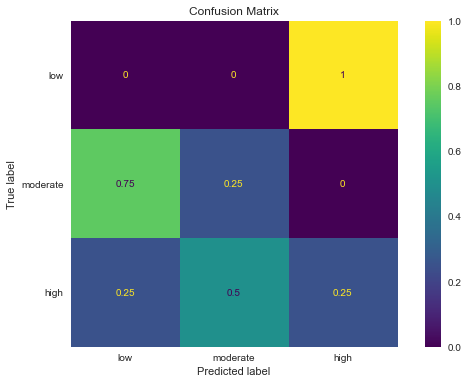

In [170]:
tree_baseline = DecisionTreeClassifier(random_state=3)
tree_baseline.fit(X_train, y_train)
    
    # make predictions
y_hat_train = tree_baseline.predict(X_train)
y_hat_test = tree_baseline.predict(X_test)
    
    # print classification report
print(f'Training accuracy score: {round(accuracy_score(y_train,y_hat_train),2)}')
print(classification_report(y_test, y_hat_test, target_names=class_names))
    
    # plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp = plot_confusion_matrix(tree_baseline, X_test, y_test, ax = ax,
                                 display_labels = class_names,
                                 normalize='true')
plt.grid(False)

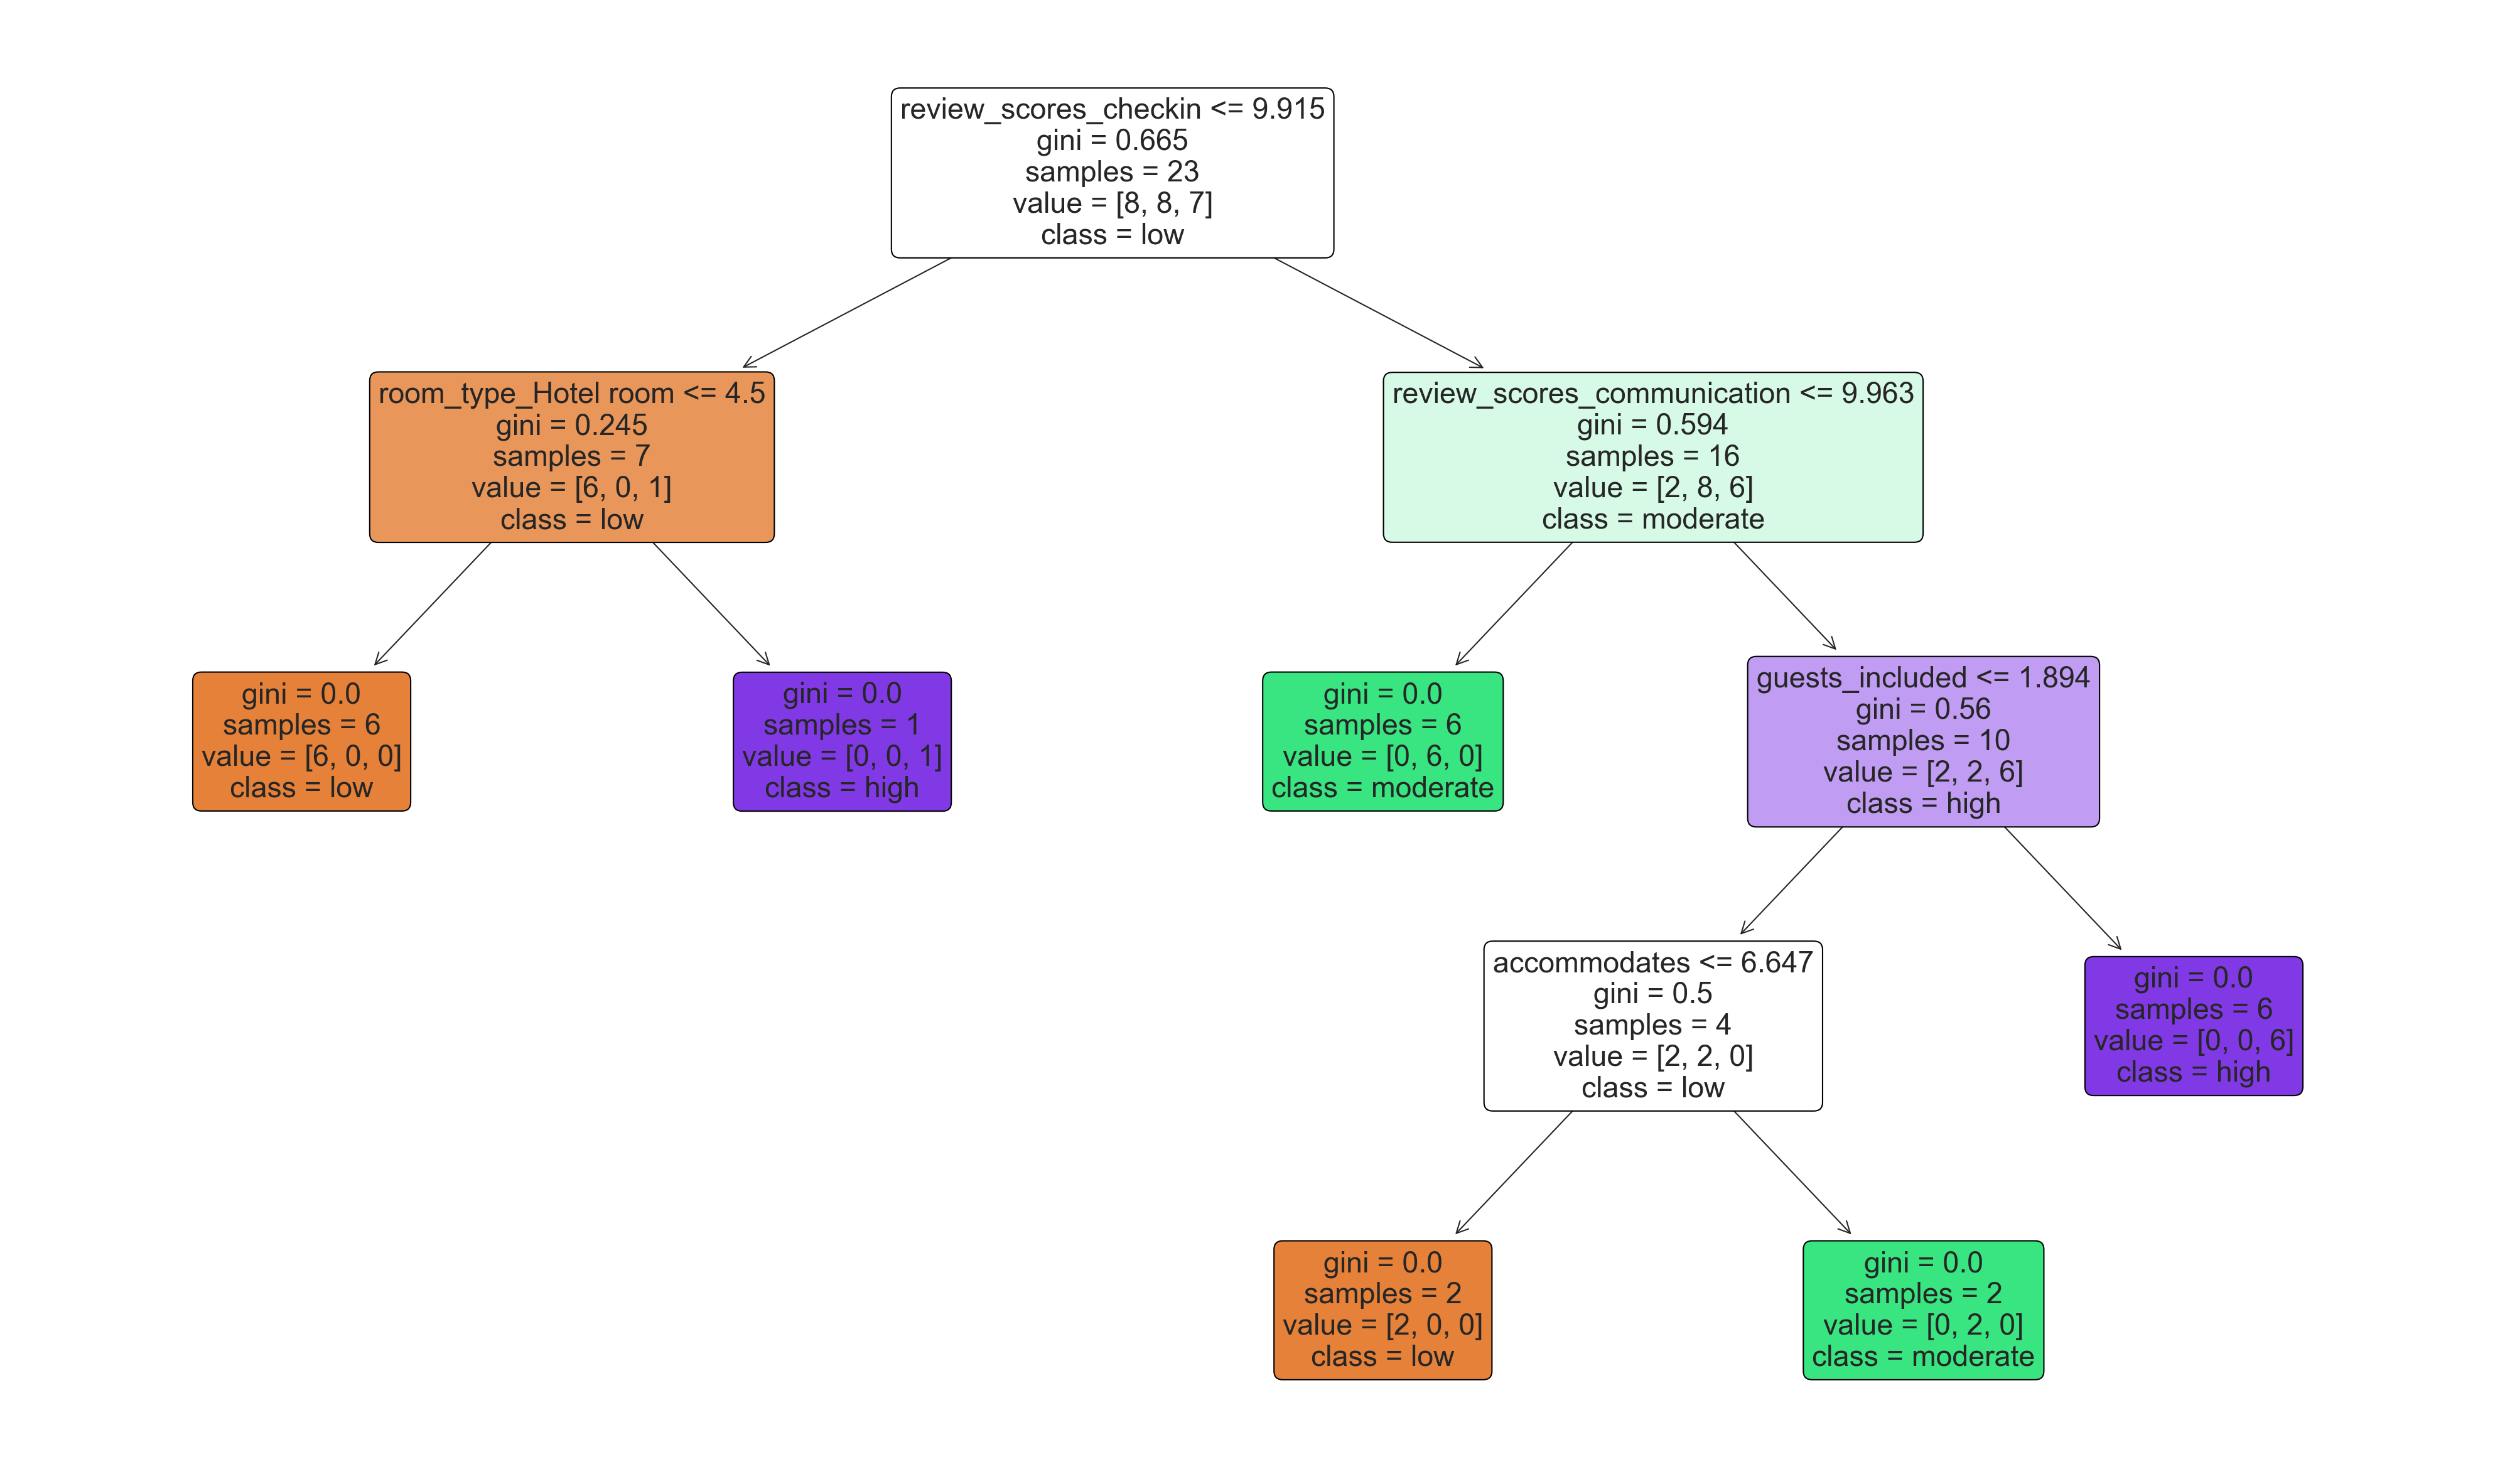

In [171]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,6), dpi=500)
plot_tree(tree_baseline,
          feature_names = X.columns, 
          class_names = class_names,
          filled = True, rounded=True)
plt.show()

In [172]:
get_scores(y_test, y_hat_test)

{'precision': 0.27, 'recall': 0.2, 'accuracy': 0.2, 'f1': 0.23}

Training accuracy score: 1.0
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         2
    moderate       0.33      0.25      0.29         4
        high       0.33      0.25      0.29         4

    accuracy                           0.20        10
   macro avg       0.22      0.17      0.19        10
weighted avg       0.27      0.20      0.23        10



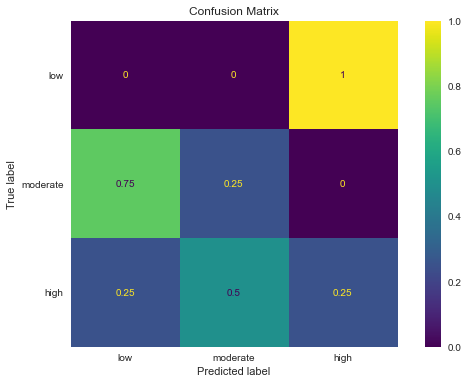

In [173]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_baseline = DecisionTreeClassifier(random_state=3)
tree_scores = run_model(tree_baseline)

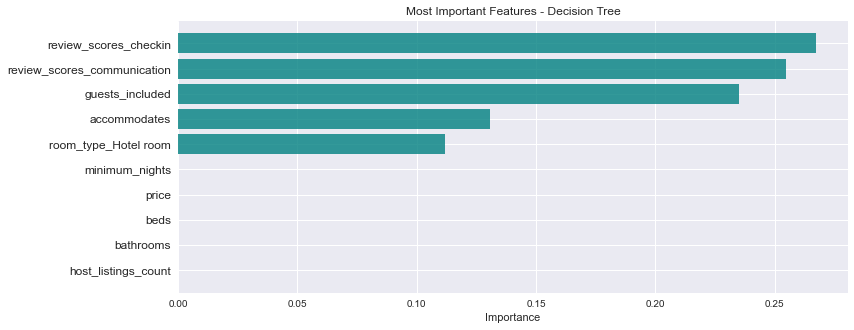

In [174]:
plot_top_10_features(tree_baseline, 'Decision Tree')

## Random Forest Model

Training accuracy score: 1.0
              precision    recall  f1-score   support

         low       0.33      1.00      0.50         2
    moderate       0.50      0.50      0.50         4
        high       0.00      0.00      0.00         4

    accuracy                           0.40        10
   macro avg       0.28      0.50      0.33        10
weighted avg       0.27      0.40      0.30        10



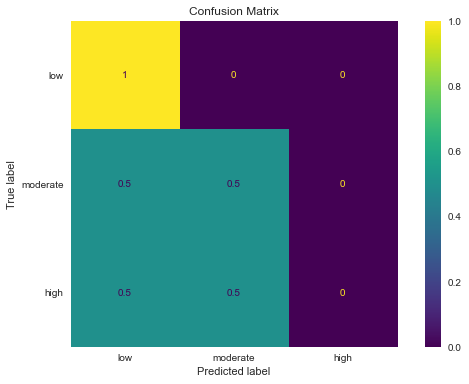

In [175]:
forest = RandomForestClassifier()
forest_scores = run_model(forest)

# Question: Can we predict whether or not an airbnb will be highly available?

## Prepare Data

### Pull in current listings dataframe

In [71]:
current_listings_df = pd.read_csv("cleaned_data/current_listing_availability.csv", index_col=0)

In [72]:
current_listings_df.head()

,last_scraped,id,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,...,neighborhood_Parkwood,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,id_count,monthly_reviews,available
0,2021-02-20,6422,12172,1,0.0,37206.0,36.17315,-86.73581,2,1.0,...,0,0,0,0,0,0.0,0.0,16,0.0,217
1,2021-02-20,25613,95811,1,1.0,37206.0,36.17826,-86.74162,2,1.0,...,0,0,0,0,0,0.0,0.0,16,0.0,21
2,2021-02-20,136015,666322,0,4.0,37214.0,36.19464,-86.67195,2,1.0,...,0,0,0,0,0,0.0,0.0,16,0.0,140
3,2021-02-20,258817,22296,1,16.0,37076.0,36.16249,-86.58988,2,1.0,...,0,0,0,0,0,0.0,0.0,16,0.0,314
4,2021-02-20,289242,22296,1,16.0,37076.0,36.16102,-86.59207,1,1.0,...,0,0,0,0,0,0.0,0.0,16,0.0,314


### Decide on threshold for 'highly available'

In [73]:
current_listings_df['available'].describe()

count    6144.000000
mean      174.482747
std       111.701149
min         0.000000
25%        74.000000
50%       196.000000
75%       277.000000
max       316.000000
Name: available, dtype: float64

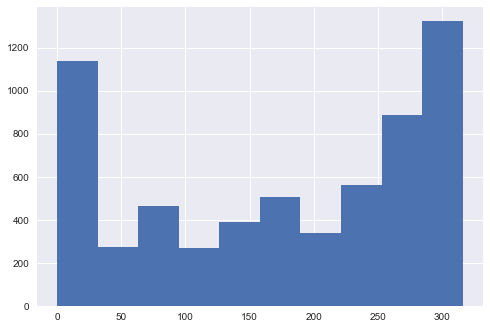

In [74]:
current_listings_df['available'].hist()

Based on InsideAirbnb's methodology, we are going to consider any availability greater than 60 days as highly available.

In [75]:
def convert_availability(x):
    if x > 60:
        # return 1 which will stand for high availability
        return 1
    else:
        # return 0 which will stand for low availability
        return 0

In [76]:
current_listings_df['availability'] = current_listings_df['available'].apply(lambda x: convert_availability(x))

In [77]:
current_listings_df

,last_scraped,id,host_id,host_is_superhost,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,...,neighborhood_South_Nashville,neighborhood_Southeast_Nashville,neighborhood_West_Nashville,neighborhood_Whites_Creek,occ_rate,monthly_income,id_count,monthly_reviews,available,availability
0,2021-02-20,6422,12172,1,0.0,37206.0,36.17315,-86.73581,2,1.0,...,0,0,0,0,0.0,0.0,16,0.0,217,1
1,2021-02-20,25613,95811,1,1.0,37206.0,36.17826,-86.74162,2,1.0,...,0,0,0,0,0.0,0.0,16,0.0,21,0
2,2021-02-20,136015,666322,0,4.0,37214.0,36.19464,-86.67195,2,1.0,...,0,0,0,0,0.0,0.0,16,0.0,140,1
3,2021-02-20,258817,22296,1,16.0,37076.0,36.16249,-86.58988,2,1.0,...,0,0,0,0,0.0,0.0,16,0.0,314,1
4,2021-02-20,289242,22296,1,16.0,37076.0,36.16102,-86.59207,1,1.0,...,0,0,0,0,0.0,0.0,16,0.0,314,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,2021-02-20,48207668,368944610,0,1813.0,37076.0,36.17157,-86.59580,5,1.0,...,0,0,0,0,0.0,0.0,1,0.0,247,1
6140,2021-02-21,48208643,359230893,0,643.0,37203.0,36.15664,-86.79764,5,2.0,...,0,0,0,0,0.0,0.0,1,0.0,233,1
6141,2021-02-20,48211893,153902467,0,0.0,37209.0,36.14538,-86.82469,2,2.0,...,0,0,1,0,0.0,0.0,1,0.0,95,1
6142,2021-02-20,48224293,368944610,0,1813.0,37214.0,36.17812,-86.64146,3,1.0,...,0,0,0,0,0.0,0.0,1,0.0,249,1


In [78]:
current_listings_df.availability.value_counts()

1    4759
0    1385
Name: availability, dtype: int64

### Select Feature Columns

Since this classifier is going to be used to predict whether or not a new listing will be highly available, we need to only use features that would be available for a new listing.

In [79]:
current_listings_df.columns

Index(['last_scraped', 'id', 'host_id', 'host_is_superhost',
       'host_listings_count', 'zipcode', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'beds', 'price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'property_type_Condominium', 'property_type_House',
       'property_type_Other', 'property_type_Townhouse',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'neighborhood_Bellevue',
       'neighborhood_Donelson', 'neighborhood_Downtown',
       'neighborhood_East_Nashville', 'neighborhood_Madison',
       'neighborhood_Midtown', 'neighborhood_North_Nashville',
       '

In [80]:
current_listings_model_data = current_listings_df[['accommodates','bathrooms','beds','price','instant_bookable',
                                                   'property_type_Condominium', 'property_type_House','property_type_Other',
                                                   'property_type_Townhouse','room_type_Hotel room', 'room_type_Private room',
                                                   'room_type_Shared room', 'neighborhood_Bellevue','neighborhood_Donelson',
                                                   'neighborhood_Downtown','neighborhood_East_Nashville',
                                                   'neighborhood_Madison','neighborhood_Midtown',
                                                   'neighborhood_North_Nashville', 'neighborhood_Parkwood',
                                                   'neighborhood_South_Nashville','neighborhood_Southeast_Nashville',
                                                   'neighborhood_West_Nashville','neighborhood_Whites_Creek','availability']]

## Run Baseline Model

In [81]:
y = current_listings_model_data['availability']
X = current_listings_model_data.drop(columns=['availability'])

In [82]:
class_names = np.array(['low','high'])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [84]:
y_train

5349    0
4801    1
4131    0
4251    1
2684    1
       ..
1730    1
5032    1
4930    1
2629    1
2492    0
Name: availability, Length: 4300, dtype: int64

Training accuracy score: 0.98
              precision    recall  f1-score   support

         low       0.49      0.30      0.37       424
        high       0.81      0.91      0.86      1420

    accuracy                           0.77      1844
   macro avg       0.65      0.60      0.61      1844
weighted avg       0.74      0.77      0.75      1844



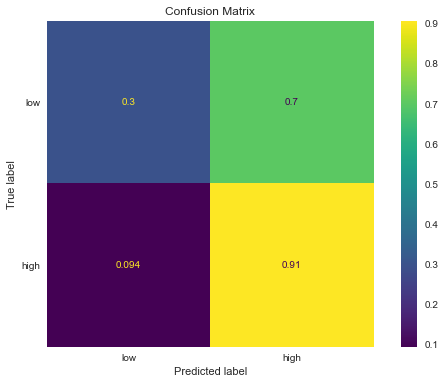

In [85]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
    
    # make predictions
y_hat_train = forest.predict(X_train)
y_hat_test = forest.predict(X_test)
    
    # print classification report
print(f'Training accuracy score: {round(accuracy_score(y_train,y_hat_train),2)}')
print(classification_report(y_test, y_hat_test, target_names=class_names))
    
    # plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')
disp = plot_confusion_matrix(forest, X_test, y_test, ax = ax,
                                 display_labels = class_names,
                                 normalize='true')
plt.grid(False)

## Deal with Class Imbalance

Training accuracy score: 0.99
              precision    recall  f1-score   support

           0       0.43      0.35      0.39       424
           1       0.82      0.86      0.84      1420

    accuracy                           0.74      1844
   macro avg       0.62      0.61      0.61      1844
weighted avg       0.73      0.74      0.73      1844



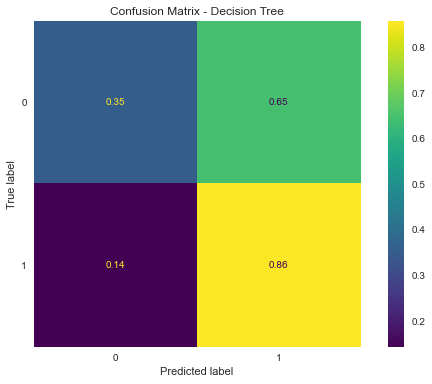

In [88]:
from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

# run the model with the resampled training set--have to run outside of the function
smote_model = forest.fit(X_train_resampled, y_train_resampled)

y_hat_train = smote_model.predict(X_train_resampled)
y_hat_test = smote_model.predict(X_test)

print(f'Training accuracy score: {round(accuracy_score(y_train_resampled,y_hat_train),2)}')
    # print classification report
print(classification_report(y_test, y_hat_test))
    
    # plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix - Decision Tree')
disp = plot_confusion_matrix(smote_model, X_test, y_test, ax = ax,
                             normalize='true')
plt.grid(False)

## AdaBoost Model

In [90]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

Training accuracy score: 0.78
              precision    recall  f1-score   support

         low       0.32      0.03      0.05       424
        high       0.77      0.98      0.87      1420

    accuracy                           0.76      1844
   macro avg       0.55      0.50      0.46      1844
weighted avg       0.67      0.76      0.68      1844



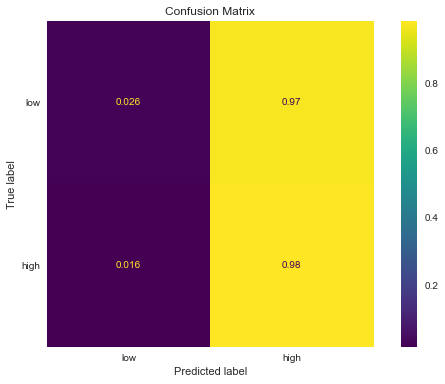

In [91]:
adaboost_clf = AdaBoostClassifier(random_state=42)
ada_scores = run_model(adaboost_clf)

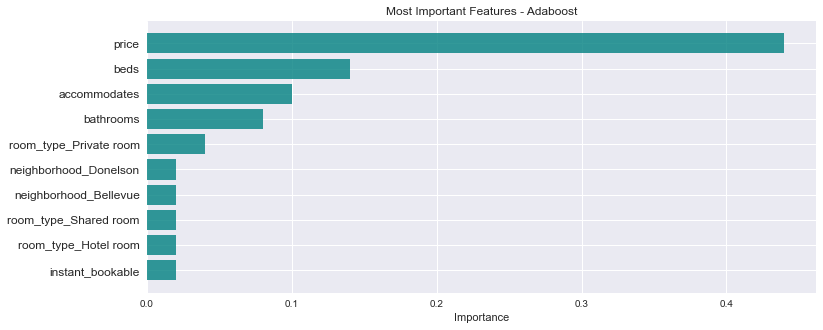

In [92]:
plot_top_10_features(adaboost_clf, 'Adaboost')

## Gradient Boosting Model

Training accuracy score: 0.8
              precision    recall  f1-score   support

         low       0.60      0.08      0.13       424
        high       0.78      0.99      0.87      1420

    accuracy                           0.78      1844
   macro avg       0.69      0.53      0.50      1844
weighted avg       0.74      0.78      0.70      1844



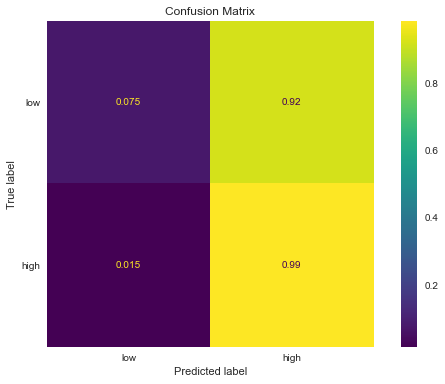

In [93]:
gbt_clf = GradientBoostingClassifier(random_state=42)
gbt_scores = run_model(gbt_clf)

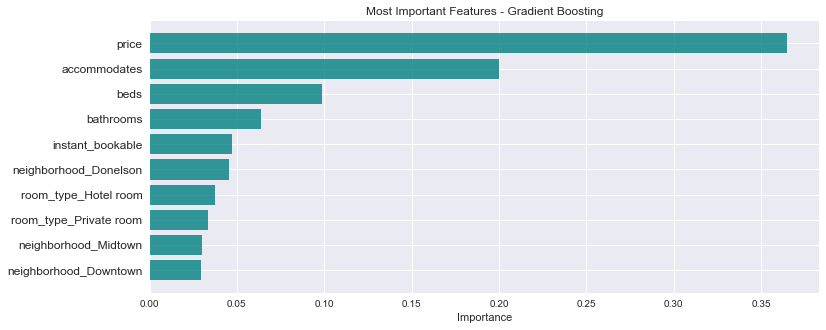

In [94]:
plot_top_10_features(gbt_clf, 'Gradient Boosting')


## XGBoost Model

In [98]:
from xgboost import XGBClassifier

Training accuracy score: 0.93
              precision    recall  f1-score   support

         low       0.50      0.26      0.34       424
        high       0.81      0.92      0.86      1420

    accuracy                           0.77      1844
   macro avg       0.65      0.59      0.60      1844
weighted avg       0.74      0.77      0.74      1844



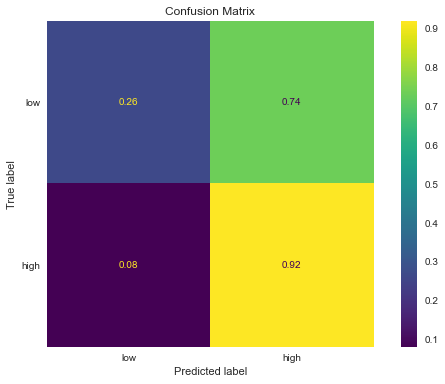

In [99]:
import warnings
warnings.filterwarnings("ignore")

xgb_clf = XGBClassifier(objective ='reg:squarederror', random_state=47)
xgb_scores = run_model(xgb_clf)